In [1]:
#Import the Necessary Dependencies
# utilities

import re
import numpy as np
import pandas as pd

# plotting

import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk

from nltk.stem import WordNetLemmatizer
import nltk
import pickle

# sklearn

from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from nltk.tokenize import word_tokenize 

In [2]:
# Importing the dataset

DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('tweets.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(30)

,target,ids,date,flag,user,text
92,0,1.620000e+18,2023-01-30 19:11:59+00:00,NO_QUERY,YWCA_SGV,#HumanTraffickingAwarenessMonthð¨ Human traf...
55,4,1.620000e+18,2023-01-31 16:07:09+00:00,NO_QUERY,worldhopeorg,"At WHI, we work with #humantraffickingsurvivor..."
565,4,1.620000e+18,2023-01-19 11:55:06+00:00,NO_QUERY,Outtranslation,January is Human Trafficking Awareness Month. ...
743,0,1.610000e+18,2023-01-14 02:00:50+00:00,NO_QUERY,NebPublicMedia,"""Sold for Sex: Survivor Stories"" includes the ..."
14,4,1.620000e+18,2023-01-31 23:15:30+00:00,NO_QUERY,DFOSanDiegoCA,Today is the last day of #humantraffickingawar...
320,4,1.620000e+18,2023-01-24 20:28:44+00:00,NO_QUERY,pdncoh,"Thank you, @ElPasoCounty !\n\nTo reduce traffi..."
287,4,1.620000e+18,2023-01-25 16:13:49+00:00,NO_QUERY,MarsysLawforGA,"We know how to heal ourselves from trauma, but..."
192,4,1.620000e+18,2023-01-27 00:10:41+00:00,NO_QUERY,CounselorNewman,The virtual Parent University: Healthy Relatio...
495,4,1.620000e+18,2023-01-20 16:06:04+00:00,NO_QUERY,MarsysLawforNC,"""We are so thankful for their mission to end h..."
447,4,1.620000e+18,2023-01-21 17:59:02+00:00,NO_QUERY,ChrisCordani1,Now on International Reporters Roundtable:\nAw...


In [3]:
# It returns a specified number of rows, string from the top

df.head(10)

,target,ids,date,flag,user,text
0,0,1.620000e+18,2023-02-01 09:31:45+00:00,NO_QUERY,Donaustroom,Nieuw op Donau: A small ngo is at the center o...
1,0,1.620000e+18,2023-02-01 08:54:20+00:00,NO_QUERY,Victims_ofFraud,https://t.co/IMWpn3S1E4\n\nUpdated report from...
2,4,1.620000e+18,2023-02-01 06:56:54+00:00,NO_QUERY,JasterixB,Just like #EpsteinClientList \n#HumanTrafficki...
3,0,1.620000e+18,2023-02-01 02:23:43+00:00,NO_QUERY,lisahawkfan,Today marks the end of #HumanTraffickingAwaren...
4,0,1.620000e+18,2023-02-01 01:43:28+00:00,NO_QUERY,V4CR_official,It's the LAST DAY of #HumanTraffickingAwarenes...
5,4,1.620000e+18,2023-02-01 01:18:23+00:00,NO_QUERY,SuncatcherNH,Whew...2 years worth of work...85 finished pag...
6,0,1.620000e+18,2023-02-01 01:09:52+00:00,NO_QUERY,HSIKansasCity,#HumanTraffickingAwarenessMonth may be ending ...
7,4,1.620000e+18,2023-02-01 00:53:03+00:00,NO_QUERY,WashingtonSRC,AUDIO: The state Senate officially recognizes ...
8,0,1.620000e+18,2023-02-01 00:50:55+00:00,NO_QUERY,EricShawnTV,Human trafficking spikes on the southern borde...
9,0,1.620000e+18,2023-02-01 00:09:15+00:00,NO_QUERY,Eh_Canadaian,Mohammad Neirabani #Lethbridge #Alberta #canad...


In [4]:
#It will print information about the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 799
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  800 non-null    int64  
 1   ids     800 non-null    float64
 2   date    800 non-null    object 
 3   flag    800 non-null    object 
 4   user    800 non-null    object 
 5   text    800 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 43.8+ KB


In [5]:
# define sum 

np.sum(df.isnull().any(axis=1))

0

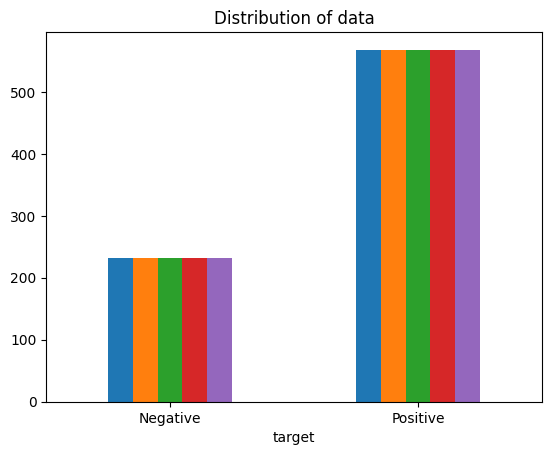

In [6]:
#data visualization of target variables
# Plotting the distribution for dataset.

ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

# Storing data in lists.

text, sentiment = list(df['text']), list(df['target'])

<AxesSubplot: xlabel='target', ylabel='count'>

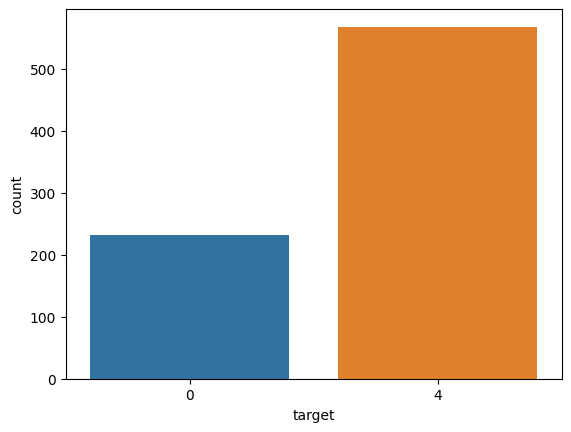

In [7]:
# traget count using seaborn

import seaborn as sns
sns.countplot(x='target', data=df)

In [8]:
data=df[['text','target']]

In [9]:
data['target'] = data['target'].replace(4,1)

C:\Users\Pallavi\AppData\Local\Temp\ipykernel_1568\2499609609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].replace(4,1)


In [10]:
#count of unique

data['target'].unique()

array([0, 1], dtype=int64)

In [11]:
# count of nunique

df['target'].nunique()  

2

In [12]:
#Separating positive and negative tweets

data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

In [13]:
#Combining positive and negative tweets

dataset = pd.concat([data_pos, data_neg])

In [14]:
# Making statement text in lowercase

dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()

775    we have this image that its people locked away...
776    another myth around human trafficking is that ...
777    just in! fl human trafficking statistics for 2...
779    btw, its #humantraffickingawarenessmonth \n\nb...
785    icymi: "it does happen here, it happens in nor...
Name: text, dtype: object

In [15]:
#Defining set containing all stopwords in English.

stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [16]:
#Cleaning and removing the above stop words list from the tweet text

STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

2     like #epsteinclientlist #humantrafficking #hum...
5     whew...2 years worth work...85 finished pages ...
7     audio: state senate officially recognizes impo...
10    january #humantraffickingawarenessmonth. learn...
11    know human trafficking expanding, also resourc...
Name: text, dtype: object

In [17]:
#Cleaning and removing punctuations

import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].head()

2     like epsteinclientlist humantrafficking humant...
5     whew2 years worth work85 finished pages amppro...
7     audio state senate officially recognizes impor...
10    january humantraffickingawarenessmonth learn s...
11    know human trafficking expanding also resource...
Name: text, dtype: object

In [18]:
#cleaning and removing repeating characters

def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].head()

2     like epsteinclientlist humantrafficking humant...
5     whew2 years worth work85 finished pages amppro...
7     audio state senate officially recognizes impor...
10    january humantraffickingawarenessmonth learn s...
11    know human trafficking expanding also resource...
Name: text, dtype: object

In [19]:
#Cleaning and removing URLs

def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].head() 

2     like epsteinclientlist humantrafficking humant...
5     whew2 years worth work85 finished pages amppro...
7     audio state senate officially recognizes impor...
10    january humantraffickingawarenessmonth learn s...
11    know human trafficking expanding also resource...
Name: text, dtype: object

In [20]:
#cleaning and removing numbers

def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].head()

2     like epsteinclientlist humantrafficking humant...
5     whew years worth work finished pages ampprob c...
7     audio state senate officially recognizes impor...
10    january humantraffickingawarenessmonth learn s...
11    know human trafficking expanding also resource...
Name: text, dtype: object

In [21]:
#Getting tokenization of tweet text

from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('\s+', gaps = True)
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text'].head()


2     [like, epsteinclientlist, humantrafficking, hu...
5     [whew, years, worth, work, finished, pages, am...
7     [audio, state, senate, officially, recognizes,...
10    [january, humantraffickingawarenessmonth, lear...
11    [know, human, trafficking, expanding, also, re...
Name: text, dtype: object

In [22]:
#Applying stemming

st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return ' '.join(text)
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

2     like epsteinclientlist humantraffick humantraf...
5     whew year worth work finish page ampprob count...
7     audio state senat offici recogn import make pe...
10    januari humantraffickingawarenessmonth learn s...
11    know human traffick expand also resourc combat...
Name: text, dtype: object

In [23]:
#Applying lemmatizer

lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return ' '.join(text)
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()


2     l i k e   e p s t e i n c l i e n t l i s t   ...
5     w h e w   y e a r   w o r t h   w o r k   f i ...
7     a u d i o   s t a t e   s e n a t   o f f i c ...
10    j a n u a r i   h u m a n t r a f f i c k i n ...
11    k n o w   h u m a n   t r a f f i c k   e x p ...
Name: text, dtype: object

In [24]:
#define x and y

X=data.text
y=data.target 

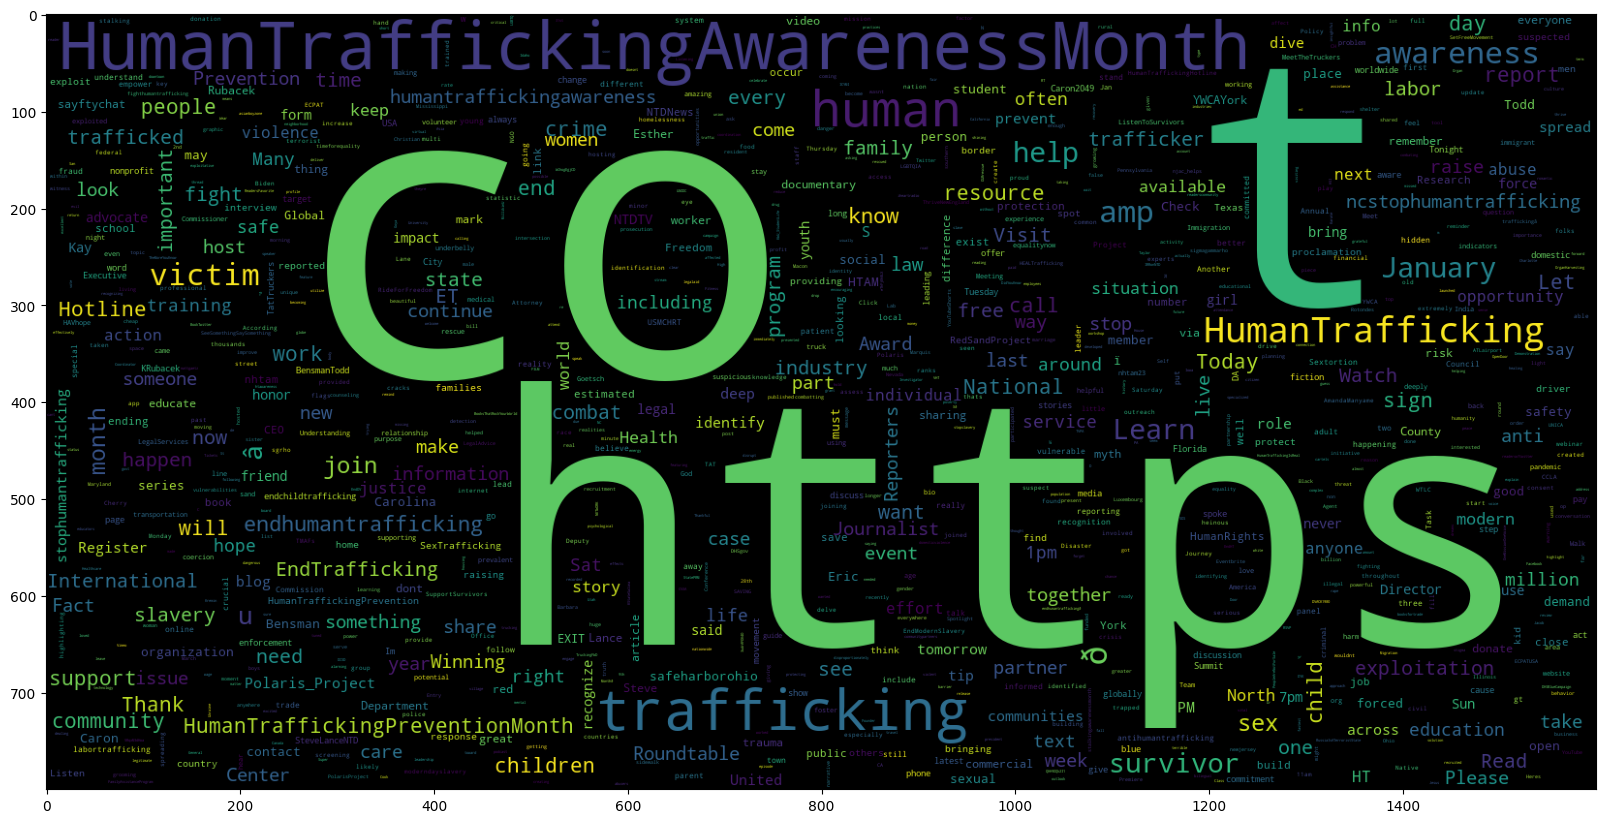

In [25]:
#Ploting a cloud of words for negative tweets

data_neg = data['text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

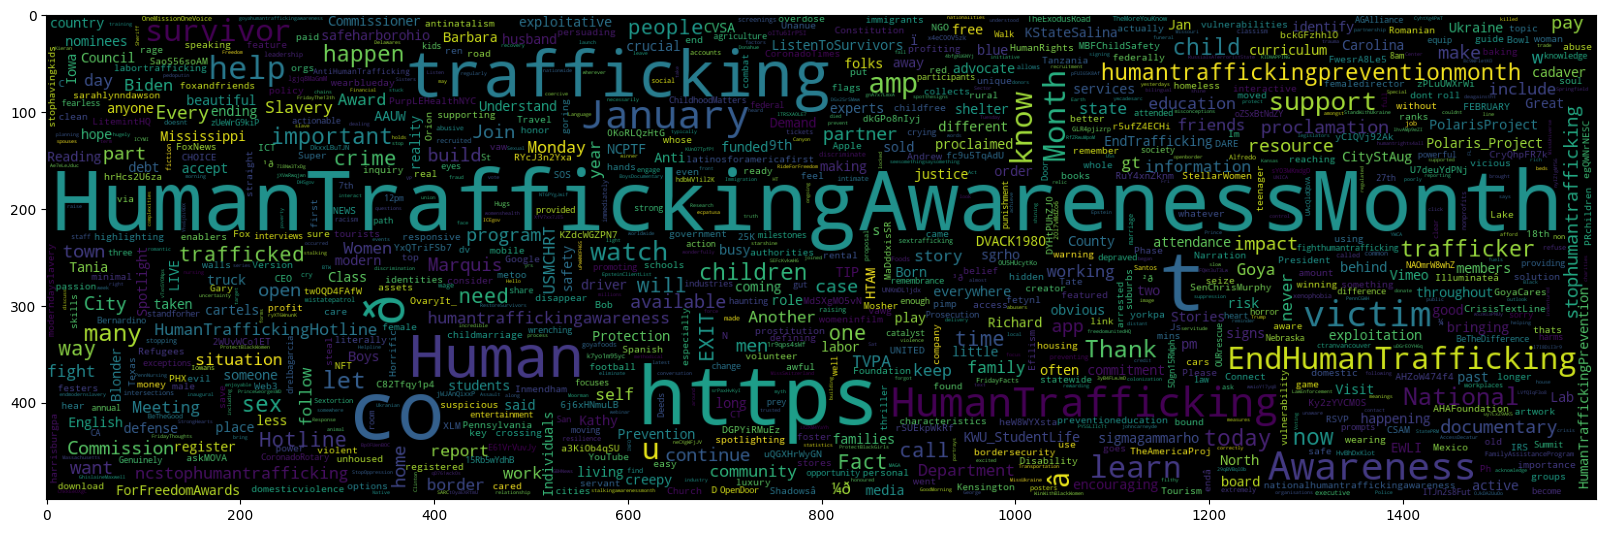

In [26]:
#Ploting a cloud of words for positive tweets

data_pos = data['text'][700:]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 500,
              collocations=False).generate(" ".join(data_pos))

plt.imshow(wc)

In [27]:
# Separating the 95% data for training data and 5% for testing data

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

In [28]:
#Giving shape to the model using vectoriser

vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))
print(X.shape)

No. of feature_words:  18711
(800,)


In [29]:
#Saving the model of vectorizer in the pkl file

pkl_name= "vectorizer.pkl"
with open(pkl_name,'wb') as file:
    pickle.dump(vectoriser, file) 

In [30]:
# Training  and Testing the model using vectoriser

X_train = vectoriser.transform(X_train)
print(X_train.shape)
X_test  = vectoriser.transform(X_test)

(760, 18711)


In [31]:
#defining the model

def model_Evaluate(model):

# Predict values for Test dataset

    y_pred = model.predict(X_test)

# Print the evaluation metrics for the dataset.

    print(classification_report(y_test, y_pred))

# Compute and plot the Confusion matrix

    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20) 

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.91      1.00      0.95        31

    accuracy                           0.93        40
   macro avg       0.96      0.83      0.88        40
weighted avg       0.93      0.93      0.92        40



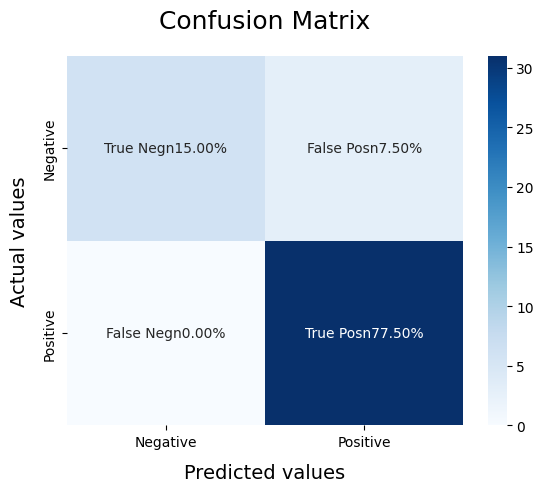

In [32]:
#Creating a svc model

SVCmodel = LinearSVC()
SVC1=SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

In [33]:
#Saving the model of svc in the pkl file

pkl_name= "svc_model.pkl"
with open(pkl_name,'wb') as file:
    pickle.dump(SVC1, file) 

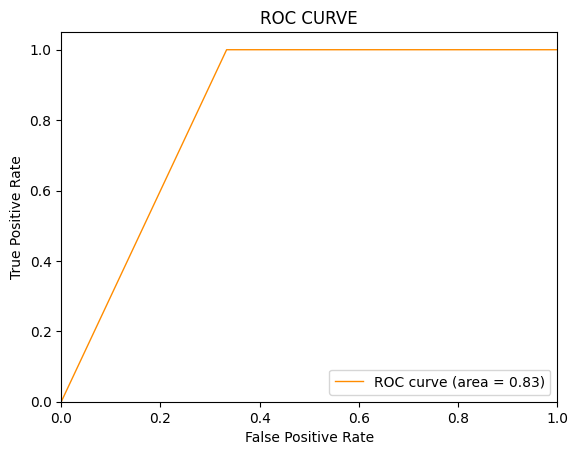

In [34]:
#Creating a roc_curve(Receiver Operating Characteristic)

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()